In [1]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

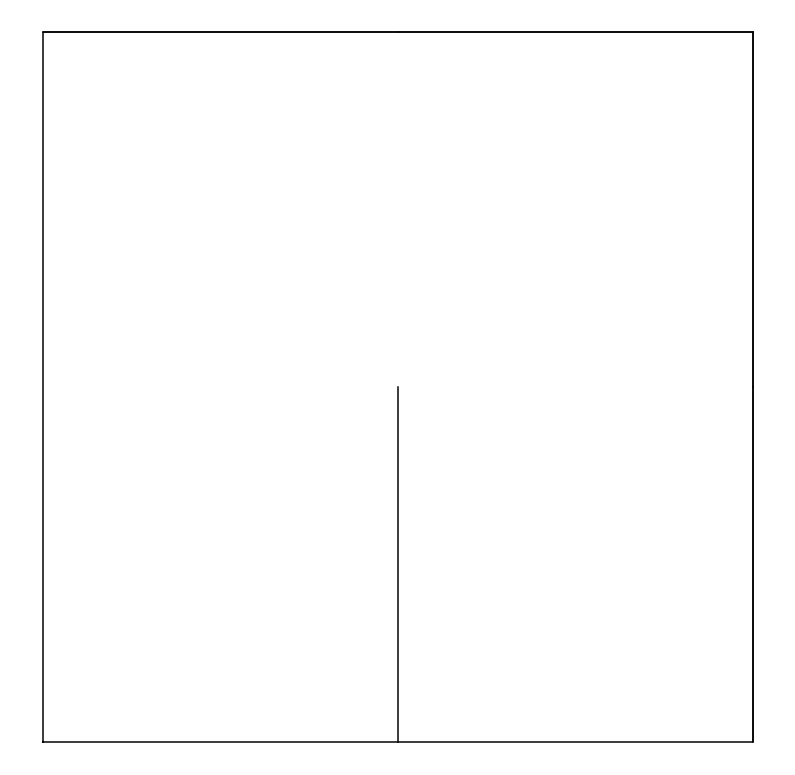

In [10]:
#display_maze(maze)

vertices = set([ (0,0),
                 (0,1),
                 (1,0),
                 (1,1)]) #cellules

edges = set([((0,0),(0,1)),
             ((0,1),(0,0)),
             ((1,1),(1,0)),
             ((1,0),(1,1)),
             ((1,1),(0,1)),
             ((0,1),(1,1))
             ]) #arêtes = chemins possibles (2 sens)
             
weights = { ((0,0),(0,1)):1, ((0,1),(0,0)):1} #poids des arêtes 

display_maze((vertices, edges, weights))